In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [85]:
df = pd.read_csv('AQI_dataset.csv')

In [86]:
df.shape

(5000, 10)

In [87]:
df.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [88]:
df = df.iloc[:,[0,1,2,3,4,5,6,9]]

In [89]:
df.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,Good


In [90]:
mask = df['Air Quality'] == 'Moderate'

In [91]:
df[mask].shape

(1500, 8)

In [92]:
df[mask].head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,Moderate
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,Moderate
11,32.5,51.2,1.6,10.5,21.6,19.3,1.53,Moderate
15,32.0,78.9,22.4,29.9,27.5,11.8,1.48,Moderate
18,34.7,59.3,9.0,15.7,28.5,7.1,1.52,Moderate
20,27.6,44.1,3.5,14.4,30.7,9.4,0.97,Moderate
35,27.7,86.1,83.3,93.5,25.3,6.8,1.71,Moderate
44,27.8,62.8,8.7,13.2,29.7,15.8,1.40,Moderate


In [93]:
mask2 = df['Temperature'] >= 43

In [94]:
df[mask & mask2]

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Air Quality
2418,43.0,64.7,12.3,21.3,29.6,6.6,1.72,Moderate
3051,43.7,76.2,56.6,64.2,23.2,12.3,1.40,Moderate


In [95]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

<Axes: ylabel='count'>

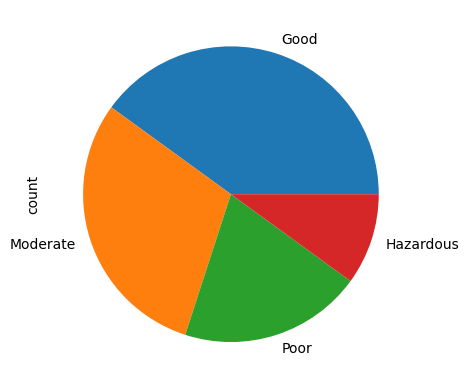

In [96]:
df['Air Quality'].value_counts().plot(kind = 'pie')

<Axes: ylabel='Frequency'>

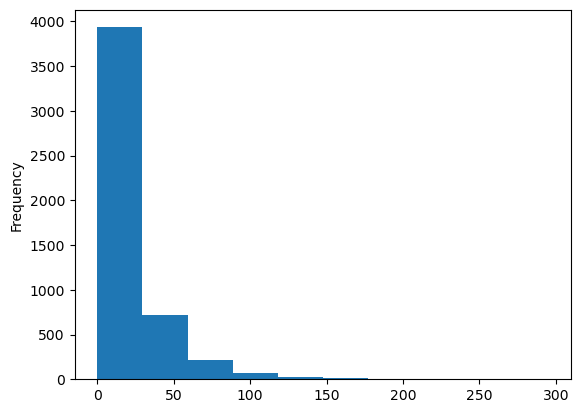

In [97]:
df['PM2.5'].plot(kind = 'hist')

In [98]:
series = df['PM10'].value_counts().head(15)

In [99]:
series.values

array([28, 26, 25, 24, 24, 24, 23, 22, 22, 22, 21, 21, 21, 20, 20],
      dtype=int64)

In [100]:
series.index

Index([ 8.1, 16.3, 10.9, 14.1, 18.9,  8.4,  8.8,  8.0, 15.5, 14.9, 14.2,  6.7,
        9.5,  7.0,  8.9],
      dtype='float64', name='PM10')

In [101]:
print(df.columns)


Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Air Quality'],
      dtype='object')


C:\Users\abhin\AppData\Local\Temp\ipykernel_3376\1339126535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Air Quality", data=df, palette="Set2")


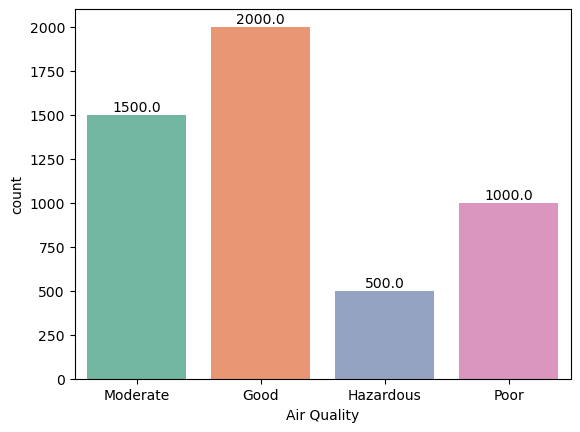

In [102]:

# Create the countplot with a custom color palette
ax = sns.countplot(x="Air Quality", data=df, palette="Set2")

# Annotate the bars with the count values
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, height, ha="center")


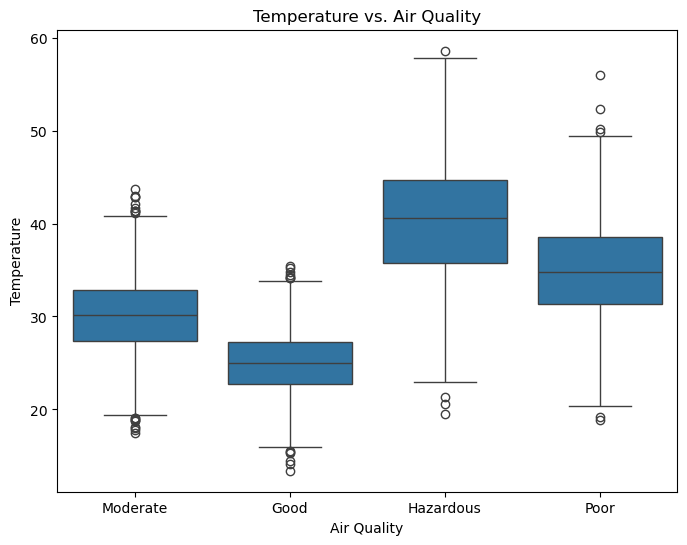

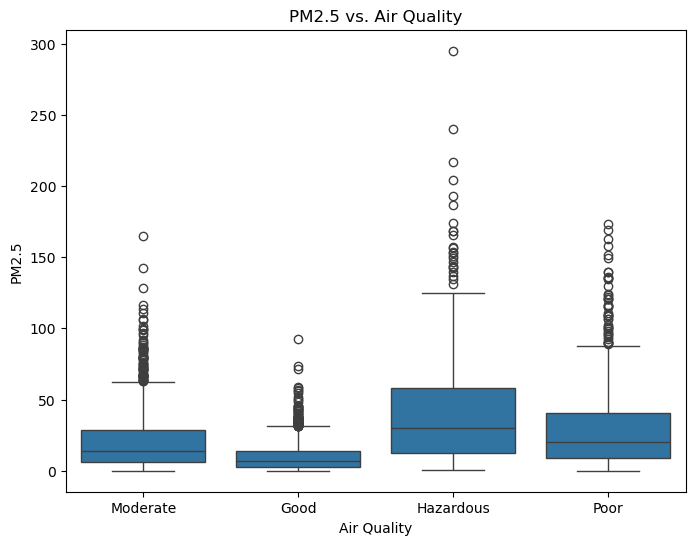

In [103]:
import matplotlib.pyplot as plt

# Boxplot for Temperature vs. Air Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x="Air Quality", y="Temperature", data=df)
plt.title("Temperature vs. Air Quality")
plt.show()

# Boxplot for PM2.5 vs. Air Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x="Air Quality", y="PM2.5", data=df)
plt.title("PM2.5 vs. Air Quality")
plt.show()


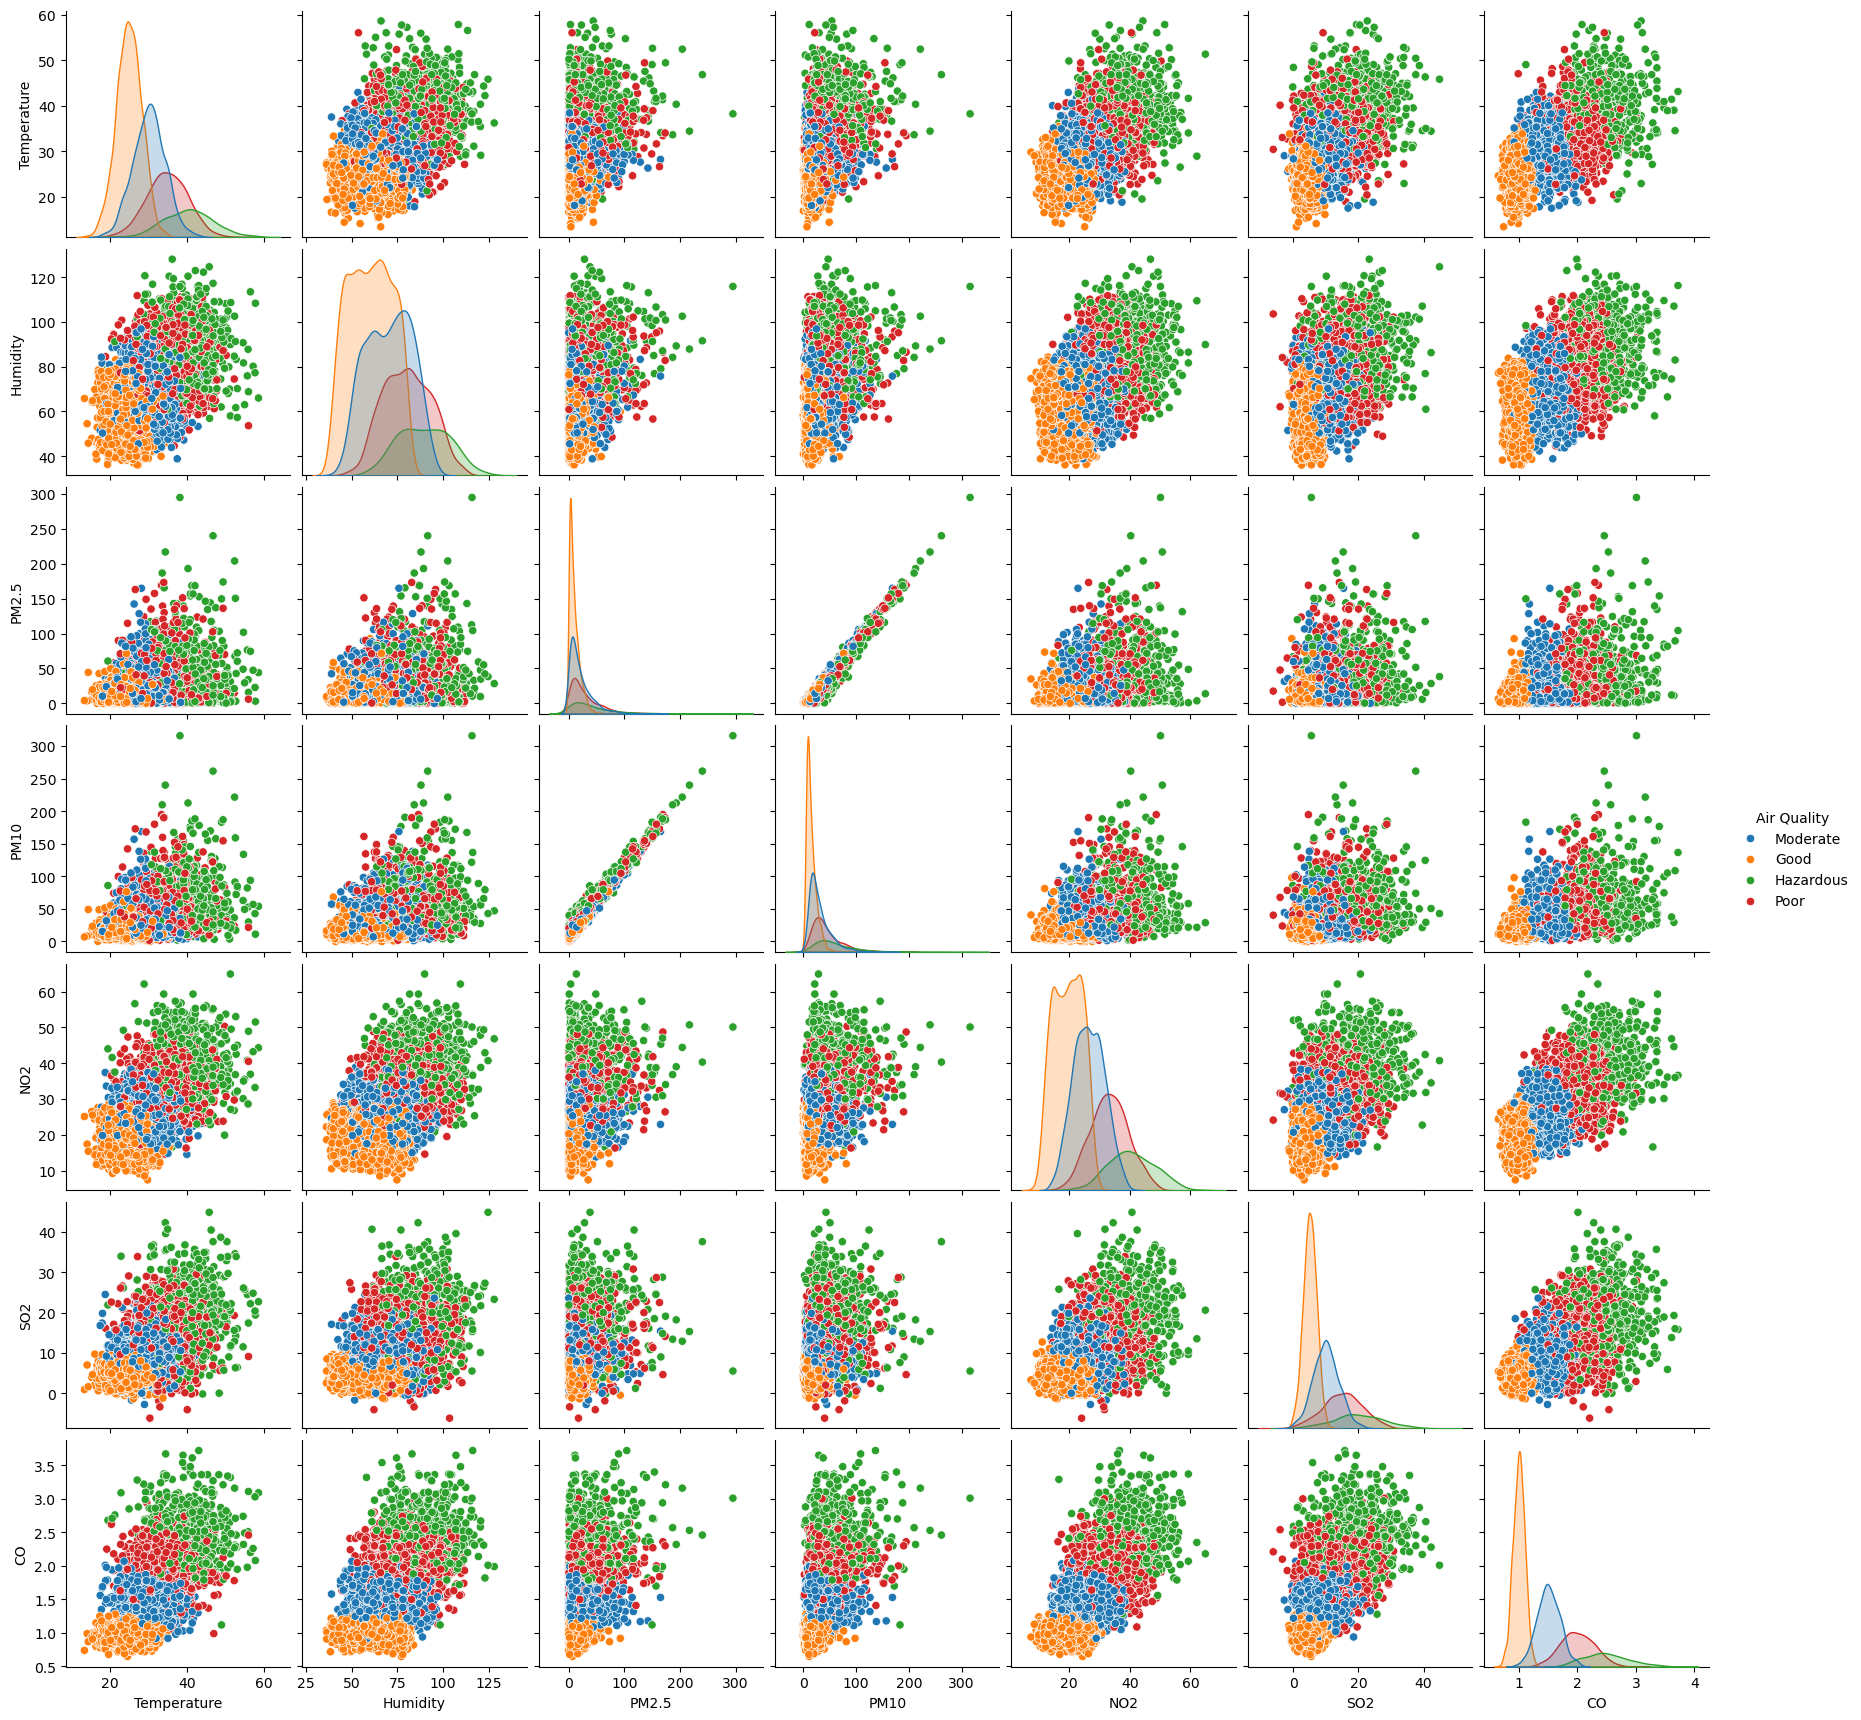

In [104]:
sns.pairplot(df, hue="Air Quality", vars=["Temperature", "Humidity", "PM2.5", "PM10", "NO2", "SO2", "CO"])
plt.show()


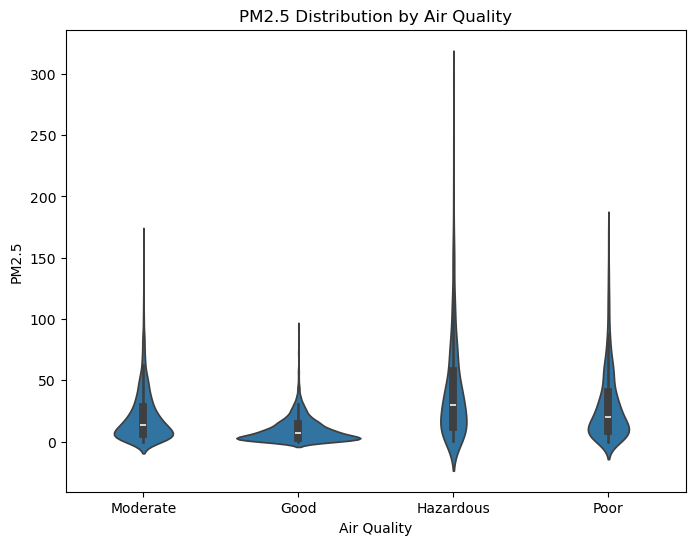

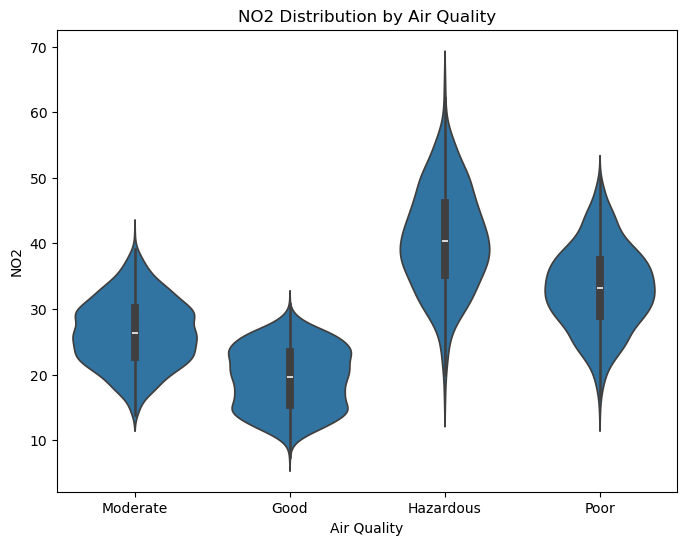

In [105]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Air Quality", y="PM2.5", data=df)
plt.title("PM2.5 Distribution by Air Quality")
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x="Air Quality", y="NO2", data=df)
plt.title("NO2 Distribution by Air Quality")
plt.show()


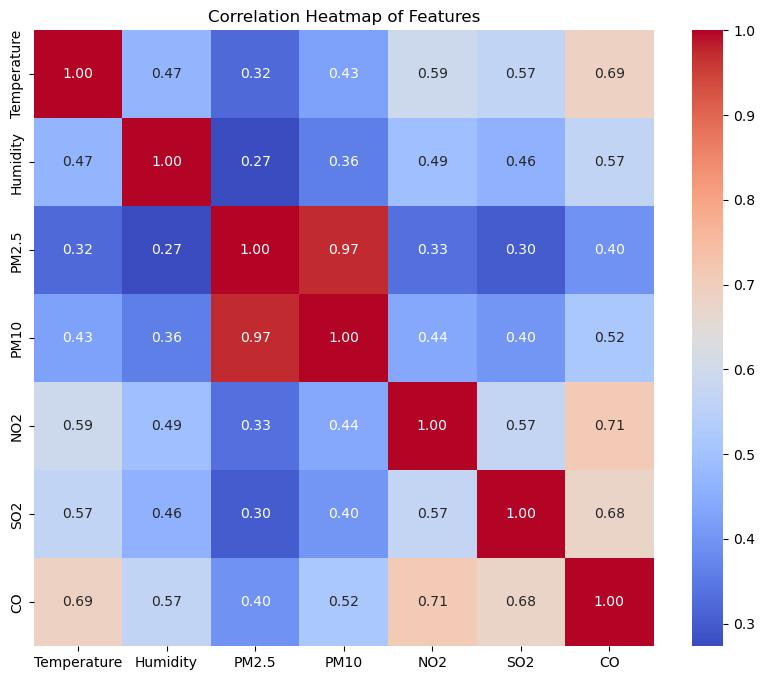

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df[["Temperature", "Humidity", "PM2.5", "PM10", "NO2", "SO2", "CO"]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


In [210]:
# Assume 'data' is your DataFrame
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Air Quality'] = label_encoder.fit_transform(df['Air Quality'])

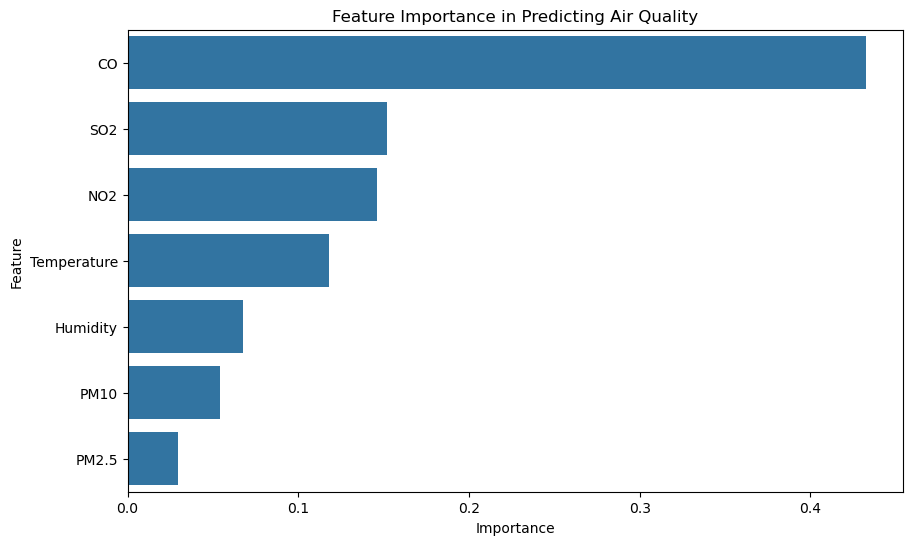

       Feature  Importance
6           CO    0.432327
5          SO2    0.151948
4          NO2    0.146407
0  Temperature    0.118099
1     Humidity    0.067433
3         PM10    0.053976
2        PM2.5    0.029811


In [212]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features (X) and target (y)
X = df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO']]
y = df['Air Quality']

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance from the model
feature_importance = model.feature_importances_

# Create a DataFrame for easier interpretation
import pandas as pd
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance in Predicting Air Quality")
plt.show()

# Print the sorted features
print(feature_df)


In [214]:
y

0       2
1       2
2       2
3       0
4       0
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Air Quality, Length: 5000, dtype: int64

In [216]:
X

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01
...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89


In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [220]:
train_test_split(X, y, test_size=0.2, random_state=42)

[      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO
 4227         38.8      92.5    8.3  29.0  32.8   8.3  2.19
 4676         26.3      54.1    0.9  10.3  25.1   4.5  0.95
 800          37.2     111.3    0.2   8.8  31.9  18.5  2.12
 3671         17.5      57.2    8.7  13.6  25.6   3.1  1.03
 4193         26.7      54.8    5.8  11.3  15.8   4.5  1.25
 ...           ...       ...    ...   ...   ...   ...   ...
 4426         30.0      59.7   59.3  68.8  22.1   7.4  1.39
 466          27.7      54.0   17.6  23.2  24.6  11.1  1.27
 3092         24.2      67.6   19.4  35.1  24.2   9.6  1.91
 3772         21.4      76.4   15.3  22.1  12.4   3.4  0.96
 860          34.4     103.1   29.2  42.2  54.4  23.6  3.37
 
 [4000 rows x 7 columns],
       Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO
 1501         31.3      73.4   72.8  88.8  54.1  17.1  2.54
 2586         24.0      68.8    0.8   8.6  20.9   2.4  1.16
 2653         25.4      78.6    4.1   6.7  21.3   9.1  1.40
 1055       

In [222]:
X_test.shape

(1000, 7)

In [224]:
X_train.shape

(4000, 7)

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [228]:
x_train_scaled = scaler.fit_transform(x_train)

In [230]:
x_train_scaled

array([[ 1.29711117,  1.41204699, -0.48178234, ...,  0.72126828,
        -0.25542792,  1.27823849],
       [-0.55649265, -1.00679356, -0.77737332, ..., -0.1473457 ,
        -0.82511105, -1.01424265],
       [ 1.05984988,  2.59627101, -0.80533463, ...,  0.61974197,
         1.27372152,  1.14882423],
       ...,
       [-0.86789809, -0.15641993, -0.03839587, ..., -0.248872  ,
        -0.06053633,  0.76058146],
       [-1.28310534,  0.3978977 , -0.20216925, ..., -1.57999472,
        -0.99001932, -0.9957549 ],
       [ 0.64464263,  2.07974776,  0.35306246, ...,  3.15789968,
         2.03829625,  3.45979312]])

In [232]:
x_test_scaled = scaler.transform(x_test)

In [234]:
x_test_scaled

array([[ 0.18494888,  0.20892578,  2.09465256, ...,  3.12405758,
         1.06383826,  1.92530978],
       [-0.89755575, -0.08083116, -0.78136779, ..., -0.62113514,
        -1.13993594, -0.62599987],
       [-0.68995212,  0.5364771 , -0.6495502 , ..., -0.57601233,
        -0.13549463, -0.18229385],
       ...,
       [ 0.12563356,  1.41204699,  0.15733329, ...,  0.958163  ,
         1.19876322,  0.26141218],
       [-0.33406019,  0.8514303 ,  0.13336646, ..., -0.03453869,
        -0.27041959, -0.51507337],
       [ 0.08114707,  2.35060751,  0.60071976, ...,  0.54077706,
         2.00831292,  0.42780194]])

In [236]:
# Model trainning

In [238]:
from sklearn.linear_model import LogisticRegression

In [274]:
clf = LogisticRegression()

In [276]:
clf.fit(x_train_scaled,y_train)

LogisticRegression()

In [278]:
y_pred = clf.predict(x_test_scaled)

In [280]:
y_test

1501    1
2586    0
2653    2
1055    1
705     0
       ..
4711    2
2313    0
3214    3
2732    2
1926    3
Name: Air Quality, Length: 1000, dtype: int64

In [282]:
from sklearn.metrics import accuracy_score

In [284]:
accuracy_score(y_test,y_pred)

0.929

In [286]:
!pip install mlxtend

In [287]:
from mlxtend.plotting import plot_decision_regions

ValueError: Filler values must be provided when X has more than 2 training features.

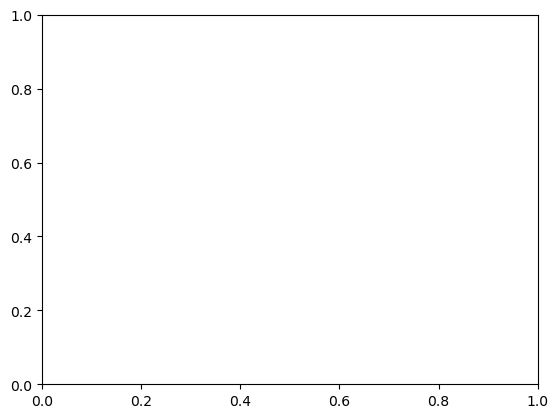

In [290]:
plot_decision_regions(x_train_scaled, y_train.values, clf=clf, legend=2)

In [292]:
import pickle

In [294]:
pickle.dump(clf,open('model.pkl','wb'))